<a href="https://colab.research.google.com/github/jjomathew98/datasci_4_web_viz/blob/main/CDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ipywidgets jupyter_contrib_nbextensions

In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Fetch the data
url = "https://raw.githubusercontent.com/jjomathew98/datasci_4_web_viz/main/PLACES__Local_Data_for_Better_Health__CT2023%20Report.csv"
df = pd.read_csv(url)
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [ ]:
# Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df = df[(df['MeasureId'] == 'BINGE') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
98,2021,CT,Connecticut,Tolland,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,16.7,...,14.2,19.5,150293,9013,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-72.3409779 41.8580807),38
144,2021,CT,Connecticut,New London,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.6,...,15.1,20.6,268805,9011,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-72.1086339 41.4726517),1045
471,2021,CT,Connecticut,New Haven,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,15.4,...,13.3,17.8,863700,9009,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-72.9002033 41.3497185),1044
474,2021,CT,Connecticut,Litchfield,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.4,...,14.8,20.2,185000,9005,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-73.2354042 41.7918833),1042
475,2021,CT,Connecticut,Middlesex,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.7,...,15.2,20.6,164759,9007,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-72.5227802 41.4330028),1043
519,2021,CT,Connecticut,Windham,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.9,...,15.1,21.1,116418,9015,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-71.9907017 41.8249987),39
547,2021,CT,Connecticut,Fairfield,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,16.4,...,14.2,18.7,959768,9001,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-73.3670614 41.2274128),1040
554,2021,CT,Connecticut,Hartford,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,15.2,...,13.2,17.5,896854,9003,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-72.7329157 41.8060534),1041


In [ ]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
Windham       17.9
Middlesex     17.7
New London    17.6
Litchfield    17.4
Tolland       16.7
Fairfield     16.4
New Haven     15.4
Hartford      15.2
Name: Data_Value, dtype: float64

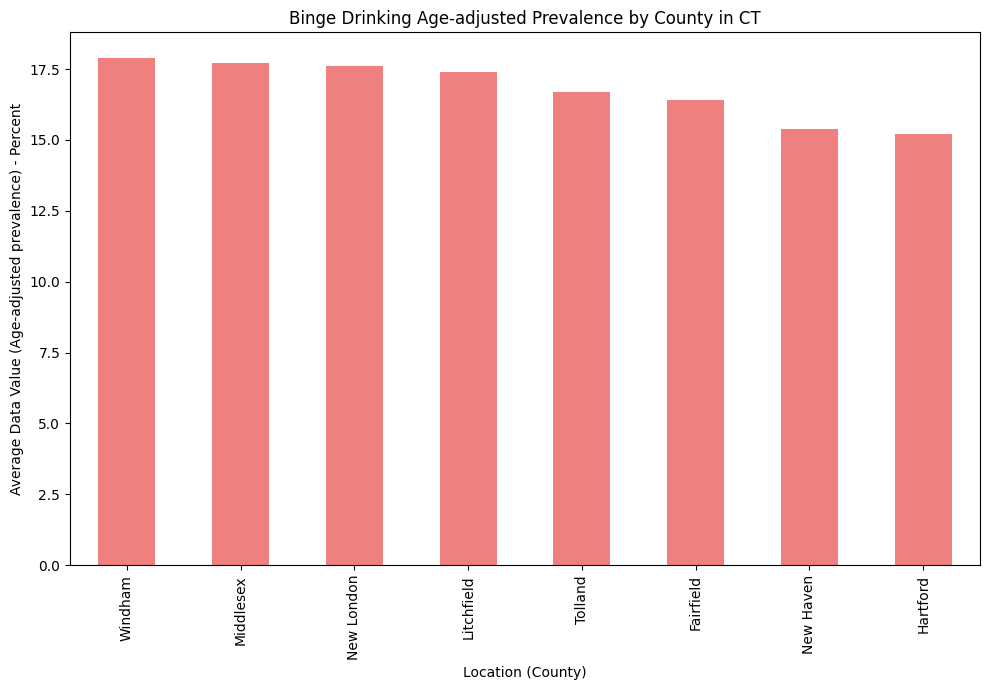

In [ ]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Binge Drinking Age-adjusted Prevalence by County in CT')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("binge_drinking_per_location.png")  # Saving the plot as an image
plt.show()

In [ ]:

import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Binge Drinking Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='County', options=('Fairfield', 'Hartford', 'Litchfield', 'Middlese…